In [37]:
#Import necessary libraries: glob, pandas, numpy, matplotlib.pyplot, MinMaxScaler, KMeans, and PCA
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [38]:
df_features = pd.read_csv('investments_investors_funding_geo2.csv')
print(df_features.columns)

Index(['investment_uuid', 'investment_name', 'investment_type',
       'investor_uuid', 'investor_name', 'investor_type', 'announced_on',
       'is_lead_investor', 'investor_country_code', 'investor_state_code',
       'investor_region', 'investor_city', 'investor_types',
       'investor_num_of_investments', 'founded_on', 'closed_on', 'fr_uuid',
       'name', 'type', 'org_country_code', 'org_state_code', 'org_region',
       'org_city', 'fr_num_of_investors', 'org_uuid', 'org_name',
       'lead_investor_uuids'],
      dtype='object')


In [39]:
# Extract unique values
unique_investor_country_codes = df_features['investor_country_code'].unique()
unique_org_country_codes = df_features['org_country_code'].unique()

for code in unique_org_country_codes:
    df_features[f'org_country_code_{code}'] = (df_features['org_country_code'] == code).astype(int)

# Include the Investor uuid and org UUID columns
df_features = df_features[['investor_uuid', 'org_uuid'] + list(df_features.columns)]

# Save the updated DataFrame to a new CSV file
df_features.to_csv('updated_investments_investors_funding_geo2.csv', index=False)

/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_90332/2530151702.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features[f'org_country_code_{code}'] = (df_features['org_country_code'] == code).astype(int)
/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_90332/2530151702.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features[f'org_country_code_{code}'] = (df_features['org_country_code'] == code).astype(int)
/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_90332/2530151702.py:6: Perf

In [40]:

df_features = df_features.loc[:, ~df_features.columns.duplicated()]
df_features

,investor_uuid,org_uuid,investment_uuid,investment_name,investment_type,investor_name,investor_type,announced_on,is_lead_investor,investor_country_code,...,org_country_code_GIN,org_country_code_BDI,org_country_code_BOL,org_country_code_PNG,org_country_code_SWZ,org_country_code_ASM,org_country_code_FJI,org_country_code_GRL,org_country_code_IRQ,org_country_code_KNA
0,b08efc27-da40-505a-6f9d-c9e14247bf36,df662812-7f97-0b43-9d3e-12f64f504fbb,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,Accel,organization,2005-05-01,True,USA,...,0,0,0,0,0,0,0,0,0,0
1,e2006571-6b7a-e477-002a-f7014f48a7e3,df662812-7f97-0b43-9d3e-12f64f504fbb,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock Partners investment in Series B - Fac...,investment,Greylock Partners,organization,2006-04-01,True,USA,...,0,0,0,0,0,0,0,0,0,0
2,8d5c7e48-82da-3025-dd46-346a31bab86f,df662812-7f97-0b43-9d3e-12f64f504fbb,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,Meritech Capital Partners,organization,2006-04-01,True,USA,...,0,0,0,0,0,0,0,0,0,0
3,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,f53cb4de-236e-0b1b-dee8-7104a8b018f9,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,Trinity Ventures,organization,2006-05-01,NaN,USA,...,0,0,0,0,0,0,0,0,0,0
4,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,4111dc8b-c0df-2d24-ed33-30cd137b3098,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,Founders Fund,organization,2007-01-17,True,USA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448472,39041e62-6b24-ae8d-1347-4cea947e832c,bf6d3b88-e5c3-b3b3-7931-f9bb3eb06bb5,19c44464-1ab1-4fac-9508-8798d8f6db04,SOSV investment in Convertible Note - Planetar...,investment,SOSV,organization,2019-12-17,NaN,USA,...,0,0,0,0,0,0,0,0,0,0
448473,523023cb-a5bc-c4ff-a7dd-d6d63afb983c,3545c952-22d2-7e1a-5bee-339525742fe3,ce137325-4f4d-45e2-b285-d47ef00cb9de,MOX investment in Seed Round - PODD,investment,MOX,organization,2019-10-24,NaN,TWN,...,0,0,0,0,0,0,0,0,0,0
448474,39041e62-6b24-ae8d-1347-4cea947e832c,3545c952-22d2-7e1a-5bee-339525742fe3,061b7643-2f27-4811-9dc1-28a7875a4975,SOSV investment in Seed Round - PODD,investment,SOSV,organization,2019-10-24,NaN,USA,...,0,0,0,0,0,0,0,0,0,0
448475,39041e62-6b24-ae8d-1347-4cea947e832c,03093a7f-4478-4e64-a541-fc1d54014d26,5b50e36f-f9eb-4a12-99c6-55c24b9e828b,SOSV investment in Seed Round - Quidli,investment,SOSV,organization,2019-11-13,NaN,USA,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Ensure 'investor_uuid' is a single-dimensional column
df_features['investor_uuid'] = df_features['investor_uuid'].astype(str)


# Extract columns that start with 'org_country_code_'
org_country_code_columns = [col for col in df_features.columns if col.startswith('org_country_code_')]

# Group by 'investor_uuid' and sum the 'org_country_code_' columns
grouped_df = df_features.groupby('investor_uuid')[org_country_code_columns].sum().reset_index()

# Save the resulting DataFrame to a new CSV file
grouped_df.to_csv('investor_uuid_org_country_code_sums.csv', index=False)

In [42]:
grouped_df

,investor_uuid,org_country_code_USA,org_country_code_IRL,org_country_code_CHE,org_country_code_ISR,org_country_code_GBR,org_country_code_LUX,org_country_code_CAN,org_country_code_FRA,org_country_code_IND,...,org_country_code_GIN,org_country_code_BDI,org_country_code_BOL,org_country_code_PNG,org_country_code_SWZ,org_country_code_ASM,org_country_code_FJI,org_country_code_GRL,org_country_code_IRQ,org_country_code_KNA
0,00011be5-d105-eaa0-69d6-6064e74916b2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0003f244-79d0-6178-353e-33dabaf3b2c6,110,0,0,12,2,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0005e438-8f64-d01c-822d-a2de10690fed,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00061f14-f018-e086-b068-41759f55cf59,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00063118-3cfe-3c48-79d9-94eaf4cdca51,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66875,fff9b47c-6fb5-05f7-8603-47ec57c49d6c,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66876,fff9d7da-1a06-4e5b-8133-08271ea44e87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66877,fffdb72e-00d3-5a4f-3e92-44efc06f3e97,2,0,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66878,ffffded7-8c63-8f47-1f8a-40582f1f975c,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
merged_df = pd.merge(df_features[['investor_uuid', 'investor_country_code']], grouped_df, on='investor_uuid', how='left')

In [45]:

# Normalize the 'org_country_code_' columns
scaler = MinMaxScaler()
grouped_df[org_country_code_columns] = scaler.fit_transform(grouped_df[org_country_code_columns])

# Convert the normalized values to integers
grouped_df[org_country_code_columns] = grouped_df[org_country_code_columns].astype(int)

# Save the normalized and integer-converted DataFrame to a new CSV file
grouped_df.to_csv('normalized_investor_uuid_org_country_code_sums.csv', index=False)

In [46]:
grouped_df

,investor_uuid,org_country_code_USA,org_country_code_IRL,org_country_code_CHE,org_country_code_ISR,org_country_code_GBR,org_country_code_LUX,org_country_code_CAN,org_country_code_FRA,org_country_code_IND,...,org_country_code_GIN,org_country_code_BDI,org_country_code_BOL,org_country_code_PNG,org_country_code_SWZ,org_country_code_ASM,org_country_code_FJI,org_country_code_GRL,org_country_code_IRQ,org_country_code_KNA
0,00011be5-d105-eaa0-69d6-6064e74916b2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0003f244-79d0-6178-353e-33dabaf3b2c6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0005e438-8f64-d01c-822d-a2de10690fed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00061f14-f018-e086-b068-41759f55cf59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00063118-3cfe-3c48-79d9-94eaf4cdca51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66875,fff9b47c-6fb5-05f7-8603-47ec57c49d6c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66876,fff9d7da-1a06-4e5b-8133-08271ea44e87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66877,fffdb72e-00d3-5a4f-3e92-44efc06f3e97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66878,ffffded7-8c63-8f47-1f8a-40582f1f975c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#This will be used for EDA, contains total non-normalised values
merged_df

,investor_uuid,investor_country_code,org_country_code_USA,org_country_code_IRL,org_country_code_CHE,org_country_code_ISR,org_country_code_GBR,org_country_code_LUX,org_country_code_CAN,org_country_code_FRA,...,org_country_code_BDI,org_country_code_BOL,org_country_code_PNG,org_country_code_SWZ,org_country_code_ASM,org_country_code_FJI,org_country_code_GRL,org_country_code_IRQ,org_country_code_KNA,cluster
0,b08efc27-da40-505a-6f9d-c9e14247bf36,USA,924,1,1,17,112,3,13,19,...,0,0,0,0,0,0,0,0,0,6
1,e2006571-6b7a-e477-002a-f7014f48a7e3,USA,649,1,0,7,12,0,5,0,...,0,0,0,0,0,0,0,0,0,19
2,8d5c7e48-82da-3025-dd46-346a31bab86f,USA,250,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,USA,378,12,0,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,4
4,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,USA,464,1,2,2,5,0,3,2,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448472,39041e62-6b24-ae8d-1347-4cea947e832c,USA,743,97,6,5,67,1,85,21,...,0,0,0,0,0,0,0,0,0,14
448473,523023cb-a5bc-c4ff-a7dd-d6d63afb983c,TWN,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448474,39041e62-6b24-ae8d-1347-4cea947e832c,USA,743,97,6,5,67,1,85,21,...,0,0,0,0,0,0,0,0,0,14
448475,39041e62-6b24-ae8d-1347-4cea947e832c,USA,743,97,6,5,67,1,85,21,...,0,0,0,0,0,0,0,0,0,14


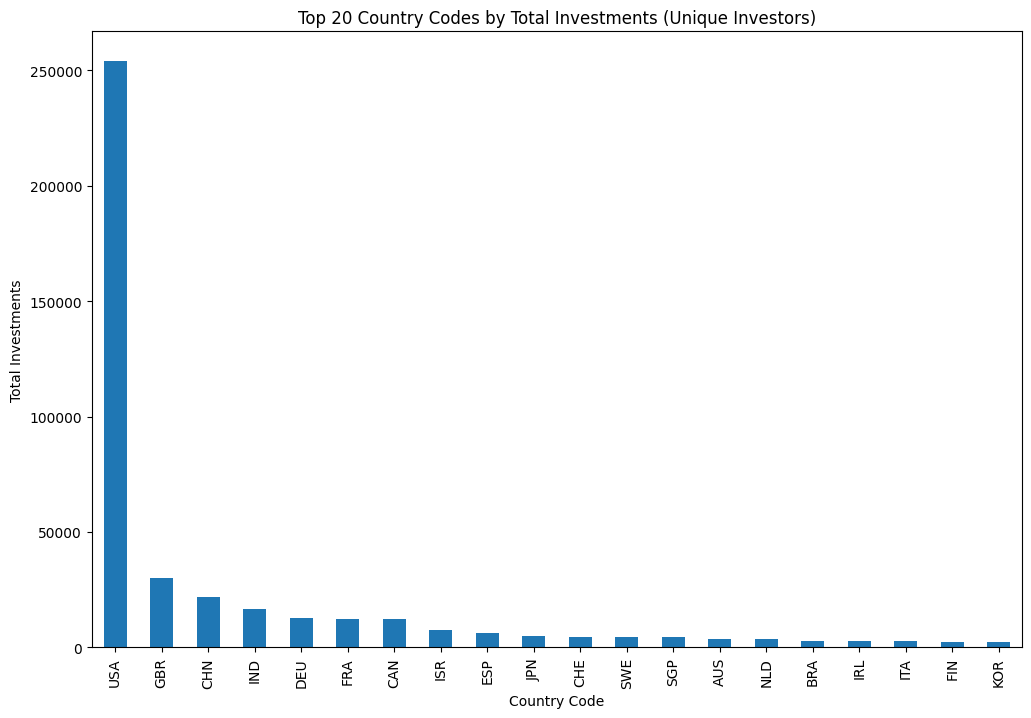

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop duplicate investor_uuids
unique_investors_df = merged_df.drop_duplicates(subset=['investor_uuid'])

# List of country code columns (excluding 'investor_uuid' and other non-country columns)
country_code_columns = unique_investors_df.columns.difference(['investor_uuid', 'investor_country_code', 'cluster'])

# Sum the values for each country code column
country_code_sums = unique_investors_df[country_code_columns].sum()

# Select the top 20 country codes
top_20_country_codes = country_code_sums.nlargest(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_20_country_codes.plot(kind='bar')
plt.xlabel('Country Code')
plt.ylabel('Total Investments')
plt.title('Top 20 Country Codes by Total Investments (Unique Investors)')

# Modify x-tick labels to show only the last three letters
ax = plt.gca()
ax.set_xticklabels([label[-3:] for label in top_20_country_codes.index], rotation=90)

plt.show()

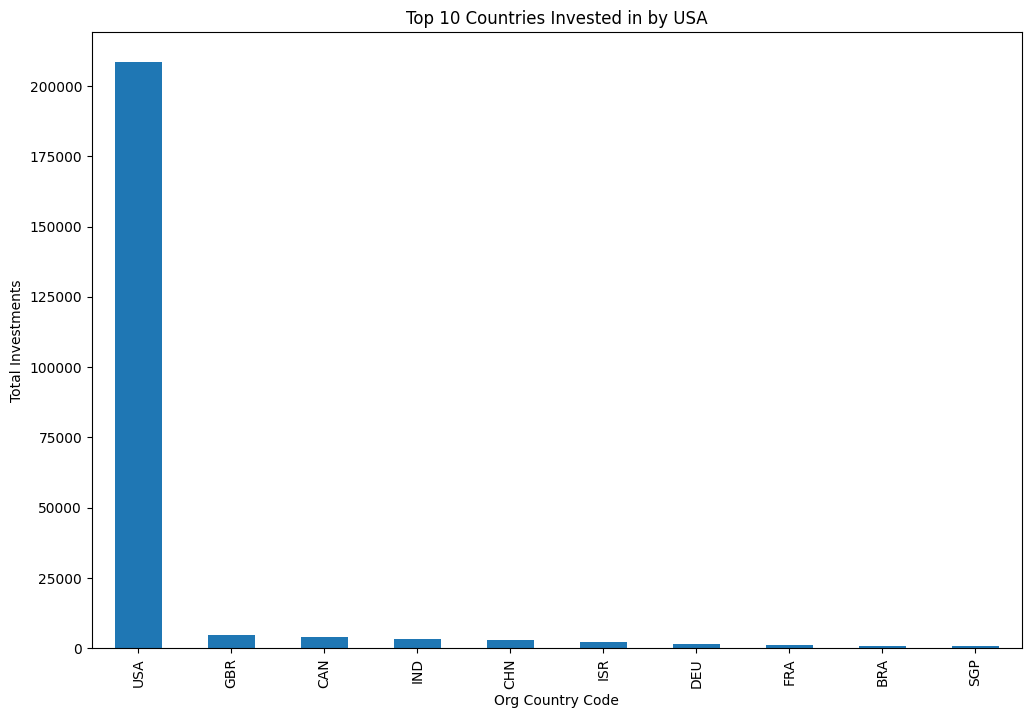

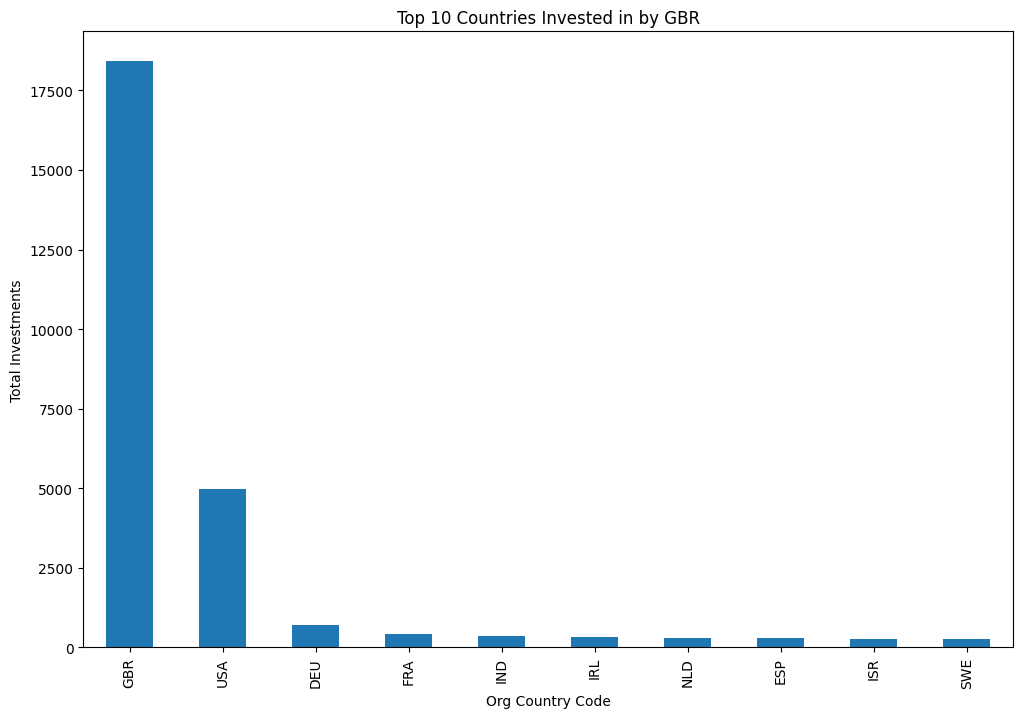

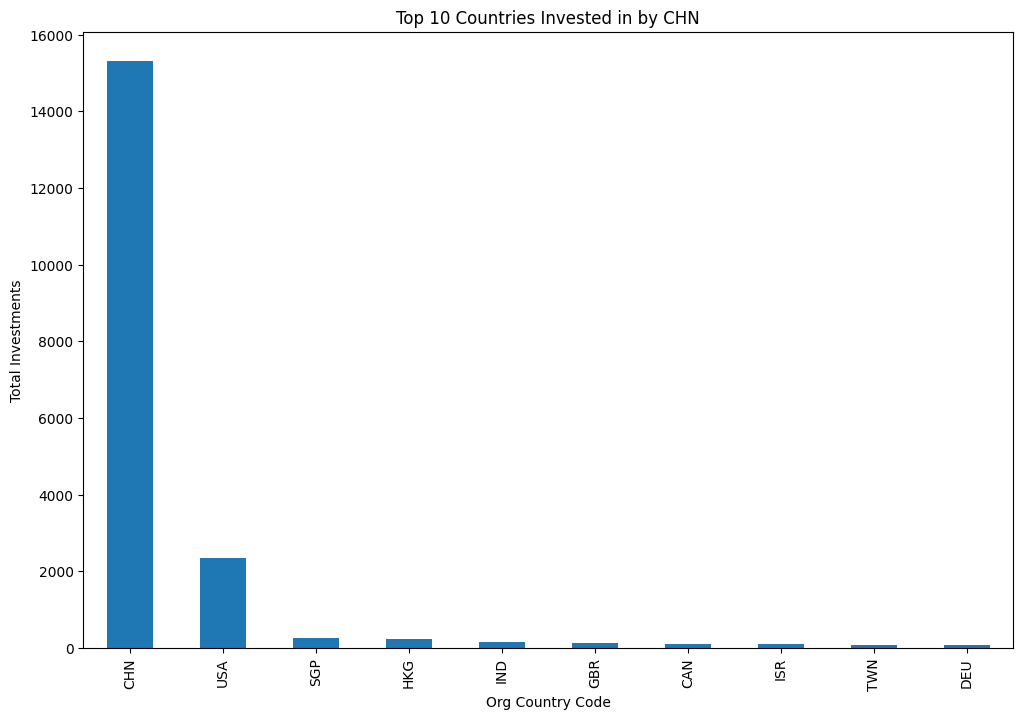

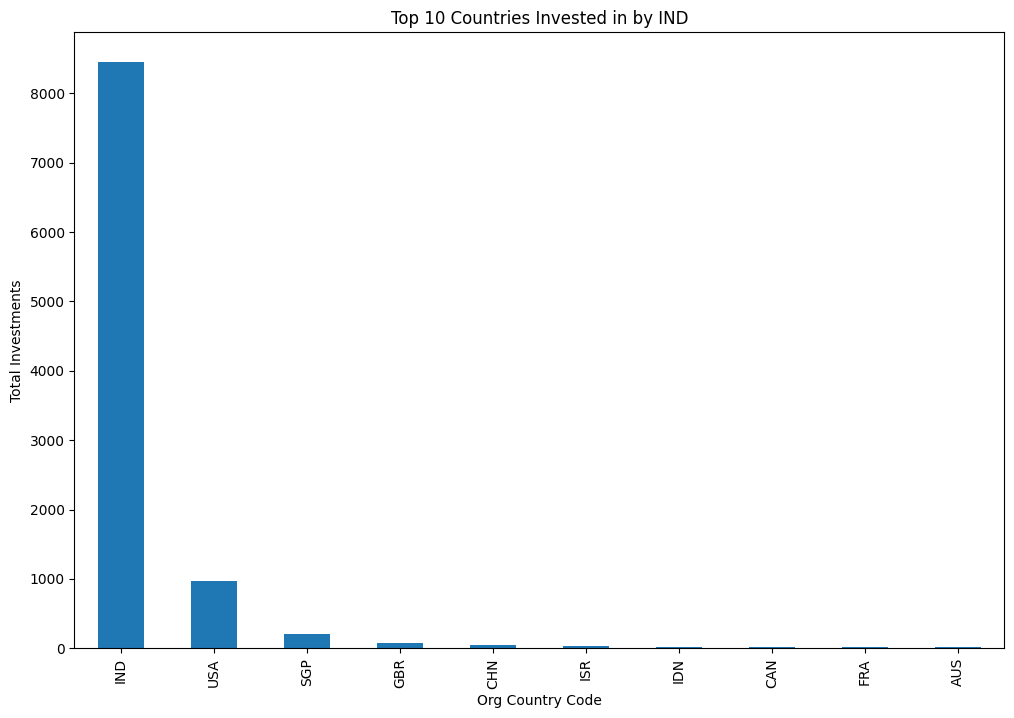

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop duplicate investor_uuids
unique_investors_df = merged_df.drop_duplicates(subset=['investor_uuid'])

# Extract columns that start with 'org_country_code_'
org_country_code_columns = [col for col in unique_investors_df.columns if col.startswith('org_country_code_')]

# Sum the values for each org country code column
org_country_code_sums = unique_investors_df[org_country_code_columns].sum()

# Identify the top 4 investor countries
top_investor_countries = unique_investors_df['investor_country_code'].value_counts().nlargest(4).index

# Plot a bar graph for each of the top 4 investor countries and the top 10 countries they are investing in
for investor_country in top_investor_countries:
    # Filter the DataFrame for the current investor country
    investor_df = unique_investors_df[unique_investors_df['investor_country_code'] == investor_country]

    # Sum the values for each org country code column
    org_country_code_sums = investor_df[org_country_code_columns].sum()

    # Get the top 10 org country codes
    top_10_org_countries = org_country_code_sums.nlargest(10)

    # Plot the bar graph
    plt.figure(figsize=(12, 8))
    top_10_org_countries.plot(kind='bar')
    plt.xlabel('Org Country Code')
    plt.ylabel('Total Investments')
    plt.title(f'Top 10 Countries Invested in by {investor_country}')
    
    # Modify x-tick labels to show only the last three letters
    ax = plt.gca()
    ax.set_xticklabels([label[-3:] for label in top_10_org_countries.index], rotation=90)
    
    plt.show()